### Problem Statement

South Africa is an incredibly diverse and multicultural society, which is reflected in its rich linguistic diversity. People in South Africa have the freedom to express themselves in any language or culture they are comfortable with. Language plays a crucial role in society, contributing significantly to the cultural, economic, political, and social fabric of the country.

As of May 2023, South Africa recognizes 12 official languages, all with equal legal status. Given this linguistic variety, it’s common for most South Africans to speak at least two official languages.

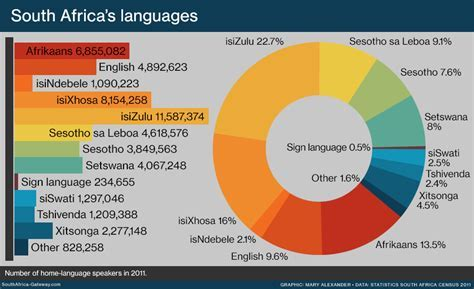

[Image credit](https://southafrica-info.com/arts-culture/11-languages-south-africa/)


In a country with such a multilingual population, it’s essential for our systems and devices to support multiple languages.

In this challenge, I will work with text from any of South Africa's 11 official languages and identify the language it is written in. This task, known as Language Identification, is a fundamental problem in Natural Language Processing (NLP), where the goal is to determine the language of a given piece of text.

---

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploring Data </a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Pre-Processing and Cleaning Data</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance Analysis and Conclusions</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section, we load all the necessary packages for the upcoming steps. These include modules for data science, visualization, Natural Language Processing (NLP), and Machine Learning (ML) that will be essential for our analysis and model building.

In [1]:
!pip install tweepy
!pip install wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tweepy
from textblob import TextBlob

import re
import string 
import nltk

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import SVC, LinearSVC
# Model perfromance matrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

C:\Users\44475\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a id="two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

In this section, we load our dataset from the local machine. To ensure data integrity, we also create copies of the dataset that can be used later, in case any mistakes are made with the original data during processing.

In [2]:
# Load train and test data
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [3]:
# create copies of our train and data set to use in case we make a mistake
dftrain = df_train.copy()
dftest = df_test.copy()

<a id="three"></a>
## 3. Exploring Data
<a href=#cont>Back to Table of Contents</a>

In this section we explore both our training and test datasets. We begin by exploring some basic characteristics of our data, such as its shape and structure. This involves examining the number of rows and columns, as well as viewing the first five rows of both our training and test datasets to get an initial understanding of the data.

In [4]:
# take a look at the shape of the train data, how many rows and columns it has 
df_train.shape

(33000, 2)

In [5]:
# Look at the first five rows of the train data
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


Our training data consists of 33,000 rows and two columns: lang_id (language ID) and text. We also have a preview of the first five rows of the dataset. This gives us an initial look at the structure and contents of our training dataset.

In [6]:
# take a look at the shape of the test data, how many rows and columns it has 
df_test.shape

(5682, 2)

In [7]:
# Look at the first five rows of the test data
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


Our test data consists of 5682 rows and two columns: index and text. We also have a preview of the first five rows of the dataset. This gives us an initial look at the structure and contents of our test dataset.

To visualize the most common words in our training dataset, we create a word cloud. Below is the code used to generate it:

<function matplotlib.pyplot.show(close=None, block=None)>

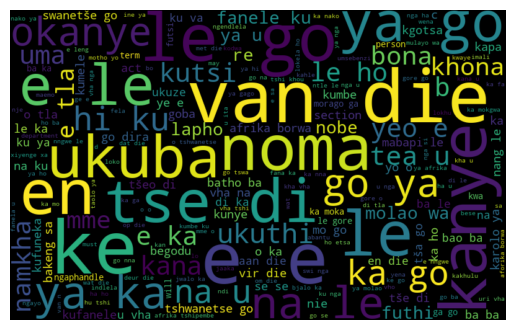

In [8]:
# plotting the wordcloud
allwords = ' '.join([txt for txt in df_train['text']])
WordCloudtest = WordCloud(width = 800, height = 500, random_state = 21 , max_font_size = 119).generate(allwords)

#Display the wordcloud
plt.imshow(WordCloudtest, interpolation = 'bilinear')
plt.axis('off')
plt.show

This visualization provides insight into the most frequent words appearing across the text in our dataset. The word cloud appears to show prominent words from different languages, with words like "van," "die," "ukuba," and "go" standing out.

To visualize the most common words in our test dataset, we create a word cloud. Below is the code used to generate it:

<function matplotlib.pyplot.show(close=None, block=None)>

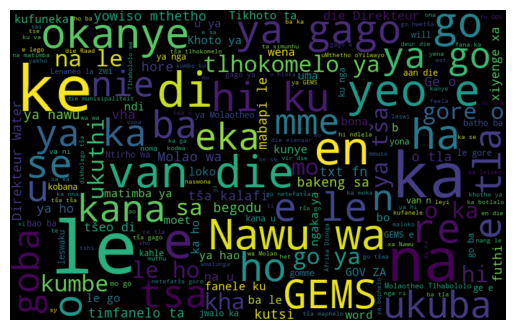

In [9]:
# plotting the wordcloud
allwords = ' '.join([txt for txt in df_test['text']])
WordCloudtest = WordCloud(width = 800, height = 500, random_state = 21 , max_font_size = 119).generate(allwords)

#Display wordcloud
plt.imshow(WordCloudtest, interpolation = 'bilinear')
plt.axis('off')
plt.show

This visualization provides insight into the most frequent words appearing across the text in our dataset. The word cloud appears to show prominent words from different languages, with words like "ke", "Nawu," "GEMS," and "okanye" standing out.

We continue to examine and explore the basic information of both our training and test datasets. We will also check for any missing values that may need to be addressed and explore potential strategies for handling them.In this section of our notebook we take a look at the basic info of our train and test datasets. We also check if there are any any missing values that need to be remedied and if any, see how we can remedy them.

In [10]:
#basic info of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


This indicates that the dataset contains 33,000 entries with two columns: `lang_id` and `text`. Both columns have no missing values, as indicated by the "Non-Null Count." The data types for both columns are classified as object, which is typical for text data. Thus, we have a complete dataset without any missing values that need to be addressed.

In [11]:
#basic info of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


This indicates that the dataset contains 5682 entries with two columns: `index` and `text`. Both columns have no missing values, as indicated by the "Non-Null Count." The data types for the columns are classified as int64 and object, respectively. Thus, we have a complete dataset without any missing values that need to be addressed.

In [12]:
# check for any missing values in the training dataset
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [13]:
# check for any missing values in the testing dataset
df_test.isnull().sum()

index    0
text     0
dtype: int64

The train data has two categorical colums and the test data has 1 categorical data.
Fortunately, both our datasets do not contain any missing values. So we move on to our EDA section.

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

In the Exploratory Data Analysis (EDA) section, we will continue to examine and visualize our data to gain a deeper understanding and identify any underlying patterns. This analysis is crucial for informing our decisions in the subsequent sections of the notebook.

We start by retrieving the unique language identifiers from the `lang_id` column in our training dataset.

In [14]:
# check our unique y variable
languages = list(np.unique(np.array(df_train.lang_id.to_list())))
languages

['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven', 'xho', 'zul']

The output indicates that our dataset includes 11 distinct languages, which are crucial for our language identification task.

To analyze the distribution of the 11 languages in our training dataset, we use the below code. This code groups the dataset by the `lang_id` column and counts the number of entries for each language. The output, total_dist, provides insight into how many samples we have for each language, helping us understand the balance of our dataset.

In [15]:
# we check the distribution of the 11 languages
total_dist = df_train.groupby(by = 'lang_id').count()
total_dist

,text
lang_id,
afr,3000
eng,3000
nbl,3000
nso,3000
sot,3000
ssw,3000
tsn,3000
tso,3000
ven,3000


Each language has an equal representation of 3,000 samples, indicating a balanced dataset. This balance is beneficial for our language identification task, as it helps ensure that the model can learn effectively from all languages represented.

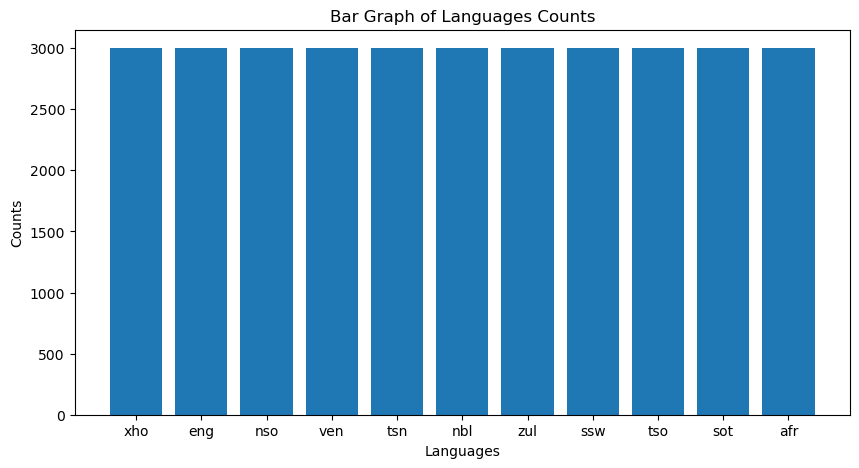

In [16]:
# Set the figure size
plt.figure(figsize=(10, 5)) 

# Calculate the frequency of each category
category_counts = df_train['lang_id'].value_counts()

# Extract the categories and their counts
categories = category_counts.index.tolist()
counts = category_counts.tolist()

# Create the bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Languages')
plt.ylabel('Counts')
plt.title('Bar Graph of Languages Counts')

# Display the plot
plt.show()


Based on the bar graph and the distribution list, our training data is normally distributed, indicating that resampling is unnecessary.

However, we noticed that the test dataset contains some entries labeled as "fn". We will investigate these entries further to understand their characteristics and determine how to address them in our analysis.

To analyze the entries labeled with "fn" tags in the test dataset, we use the below code. This code iterates through the indices of the `df_test` DataFrame, checking each entry in the text column for the presence of the "fn" tag. If an entry contains this tag, it is appended to the have_fn list for further analysis. This allows us to focus on and investigate the characteristics of these specific entries.

In [17]:
# We collect the entries having fn tags for analysis
have_fn = []
for i in df_test.index:
    txt = df_test.loc[i].text
    if '<fn>' in txt:
        have_fn.append(txt)

In [18]:
# lets print some of those special cases and see how they look like
have_fn[:4]

['<fn>(762010101403 AM) 1495 Final Gems Birthing Options_ZULU.txt</fn>',
 '<fn>GOV-ZA.107publicemercycommunicationtrestaffhelpoutatshelterformandeladayEn.2012-02-10.en.txt</fn>',
 '<fn>11311VQF2005.txt</fn>',
 '<fn>GOV-ZA.109cogtastakeholders2En.2012-02-10.en.txt</fn>']

These entries appear to be filenames or identifiers associated with certain documents. Analyzing these cases will help us understand why they are marked with "fn" and how they might affect our language identification task.

In [19]:
# how many of those special cases are available
fn_total = len(have_fn)
fn_total

108

The result shows that there are 108 entries with "fn" tags in the test dataset. This count gives us an indication of how many potentially problematic cases we need to investigate further.

To visualize the distribution of entries with and without "fn" tags in the test dataset, we create a donut chart using the following code:

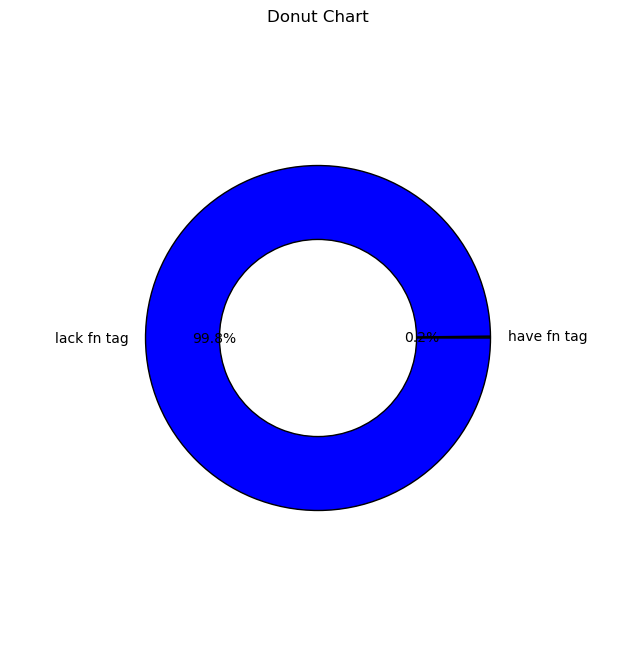

In [20]:
df_test_total = df_test.shape[0]
fn_total = 10

labels = ['have fn tag', 'lack fn tag']
values = [fn_total, (df_test_total - fn_total)]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Create the outer pie chart (donut hole)
ax.pie([80], colors=['white'], radius=1.0, wedgeprops=dict(width=0.3, edgecolor='white'))

# Create the inner pie chart (donut sections)
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'blue'], radius=0.7, wedgeprops=dict(width=0.3, edgecolor='black'))

# Set aspect ratio to be equal so that the chart is circular
ax.set(aspect="equal")

# Set the title
plt.title('Donut Chart')

# Display the chart
plt.show()



The donut chart illustrates the distribution of entries in the test dataset regarding "fn" tags:

- **Lack 'fn' tag:** 99.8% 
- **Have 'fn' tag:** 0.2%

This indicates that a vast majority of the entries in the test dataset do not have "fn" tags, while only a small fraction is marked with them. This significant imbalance suggests that the "fn" entries are rare and may require special attention in our analysis.

To calculate the failure percentage of entries with "fn" tags, we use the following formula:

In [21]:
# lets get the fn total percentage
fail_percentage = np.round((fn_total/df_test_total)*100,2)
fail_percentage

0.18

The failure percentage of entries with "fn" tags in the test dataset is 0.18%. This indicates that a very small fraction of the total entries are marked as having issues, suggesting that the majority of the data is intact and valid for analysis.

<a id="five"></a>
## 5. Pre-Processing and Cleaning Data
<a href=#cont>Back to Table of Contents</a>

In the **pre-processing** and **cleaning data** section, we prepare our raw data for further analysis or machine learning tasks. This process involves transforming and cleaning the data to ensure it meets the specific requirements necessary for effective analysis. By addressing inconsistencies and formatting issues, we enhance the quality of the dataset, making it suitable for subsequent modeling and insights.

We remove noise from the datasets, such as punctuation and numbers, to enhance data usability. The following function is designed to eliminate HTML characters, numbers, newlines, and extra whitespace while also converting the text to lowercase. This transformation helps standardize the data, making it more suitable for analysis and machine learning tasks.

In [22]:
def clean_text(text):
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    
    #Removal of numbers
    text = re.sub(r'\d+', ' ', text)
    
    # will replace newline with space
    text = re.sub("\n"," ",text)
    
    # will convert to lower case
    text = text.lower()
    
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [23]:
#we then apply the text processing to our data
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

By applying the **clean_text** function to the `text` column of both the training and testing datasets, we ensure that the same text cleaning operations are performed on the text data in both sets. This consistency in preprocessing steps is crucial for maintaining the integrity of the data and ensuring that the analysis or modeling processes yield reliable and comparable results.

In [24]:
# Replace '.txt' with 'text file'
df_train['text'] = df_train['text'].str.replace(".txt", " text file")
df_test['text'] = df_test['text'].str.replace(".txt", " text file")

The above code replaces the substring ".txt" with the more descriptive phrase text file. This modification enhances the clarity of the **text** data by providing more context about the nature of the content, making it easier to understand during analysis.

<a id="six"></a>
## 6. Modeling
<a href=#cont>Back to Table of Contents</a>

In this section, we focus on training different models to identify the most suitable one for making predictions or deriving insights from our data. By evaluating various algorithms, we aim to determine which model performs best based on our specific requirements and the characteristics of our dataset. This process is essential for ensuring that we leverage the most effective approach for our analysis.

We divide our features into "X" and "y" as follows:

In [25]:
#we devide our features into the x and y as follows
X = df_train['text']
y = df_train['lang_id']

The `text` column of the **training dataset** is assigned to "X", while the `lang_id` column is assigned to "y". This separation of features into "X" (input) and "y" (output) is a common practice in machine learning tasks, preparing the data for model training. By using "X" as the input data and "y" as the corresponding labels, we set the stage for training our machine learning model effectively. This structured approach helps ensure that the model learns to associate the textual data with the appropriate language identifiers.

We utilize the **TfidfVectorizer** to transform our text data into numerical features suitable for machine learning. The below code demonstrates this process.

In [26]:
vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_vector = vector.fit_transform(X)

This method fits the **TfidfVectorizer** to the data and transforms the input text into a matrix representation using the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme. The resulting **X_vector** variable contains the transformed text data in a numerical format, making it suitable for training machine learning models.

By leveraging the TF-IDF approach, we highlight the importance of words within the documents while accounting for their relative frequency across the entire dataset. This representation enhances the model's ability to understand and differentiate between the various textual inputs during training.

To check the shape of the transformed text data, we use the below code. This command returns the dimensions of the **X_vector** matrix, indicating the number of samples (documents) and the number of features (terms) used in the TF-IDF representation. Understanding the shape of this matrix is crucial, as it provides insights into how the text data has been transformed and how many features are available for training our machine learning models.

In [27]:
X_vector.shape

(33000, 207493)

The shape of the transformed text data is (**33000**, **207493**). This indicates that we have **33,000** documents (samples) and **207,493** features (terms) in the TF-IDF representation. This substantial number of features reflects the diversity of the text data, with each feature corresponding to a unique term or n-gram derived from the input text. This rich representation is crucial for training machine learning models effectively, as it allows them to capture various patterns and nuances in the language data.

We split the previously defined features and labels of our dataset into training and testing sets using the below code.

In this code:

- **X_vector**: Represents the transformed text data.
- **y**: Represents the corresponding language labels.

The `train_test_split` function from the `sklearn.model_selection` module is used to divide the data into:

- **X_train** and **y_train**: The training features and labels, which will be used to train the model.
- **X_test** and **y_test**: The testing features and labels, which will be used to evaluate the model's performance.

The **test_size=0.2** parameter indicates that 20% of the data will be reserved for testing, while **random_state=42** ensures reproducibility by setting a seed for random number generation. This split is essential for validating the model's performance on unseen data.

In [28]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.2, random_state=42)

#### **BUILDING CLASSIFIERS.**

In this subsection, we focus on constructing our classifiers. By training various machine learning models on the prepared dataset, we aim to identify the most effective algorithms for accurately predicting language labels based on the provided text data. This process involves selecting suitable classification techniques, fitting the models to our training data, and preparing for subsequent evaluation of their performance.

We initialize the **TfidfVectorizer model** with the following code:

In this code, we set max_features to 1,000,000, which limits the vectorizer to consider only the top 1 million terms based on their frequency across the documents. This helps to manage the dimensionality of the feature space, ensuring that our model remains efficient while still capturing a significant amount of information from the text data. By focusing on the most relevant features, we enhance the model's ability to generalize and make accurate predictions during training.

In [29]:
model = TfidfVectorizer(max_features=1000000)

We fit and transform the training text data using the initialized **TfidfVectorizer model** with the following code:

In this code:

- **X** is assigned the result of the fit_transform method applied to the 'text' column of the training dataset. This method learns the vocabulary and transforms the input text into a TF-IDF matrix representation.
- **y** is assigned the `lang_id` column from the training dataset, representing the corresponding language labels.

By applying this transformation, we prepare the text data in**X** for training our machine learning models, while **y** serves as the output labels needed for supervised learning. This step is crucial for ensuring that our models have the necessary inputs to learn from the data effectively.

In [30]:
X = model.fit_transform(df_train['text'])
y = df_train['lang_id']

To prepare the test data for evaluation, we use the following code to transform the text:

In this code, **test_x** is assigned the result of the transform method applied to the `text` column of the test dataset. Since the **TfidfVectorizer** model was previously fitted on the training data, this method uses the same vocabulary and IDF weights learned during fitting to convert the test text into a TF-IDF matrix representation.

This transformation ensures that the test data is represented in the same feature space as the training data, allowing for accurate evaluation of our machine learning models. The resulting **test_x** will be used to assess the model's performance on unseen data.

In [31]:
test_x = model.transform(df_test['text'])

e split the dataset into training and testing sets using the following code:

In this code:

- **X** represents the TF-IDF transformed text data, while y corresponds to the language labels.
- **X_train** and **y_train** are the subsets of the data that will be used for training the model.
- **X_test** and **y_test** are the subsets reserved for testing the model's performance.

The parameter **test_size=0.1** indicates that **10%** of the data will be allocated for testing, while **90%** will be used for training. The **random_state=23** ensures that the split is reproducible, allowing us to obtain the same training and testing sets each time the code is run. This process is essential for evaluating how well our model generalizes to unseen data.

In [32]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.1, random_state=23)

**Support Vector Machine Algorithm (SVM)**

We will implement the SVM algorithm on our dataset, evaluate its performance. We initialize the **Support Vector Classifier (SVC)** with the following code:

In this code, we create an instance of the SVC class from the `sklearn.svm` module, specifying the kernel parameter as 'linear'.

In [33]:
vector = SVC(kernel='linear')

We fit the **Support Vector Classifier (SVC)** to the training data using the following code:

- **Fitting the Model**: The fit method trains the SVC model using the features **X_train** and the corresponding labels **y_train**. During this process, the algorithm identifies the optimal hyperplane that separates the different language classes based on the input text data.

- **Training Process**: The fitting process involves optimizing the model parameters to minimize classification errors while maximizing the margin between the classes. The support vectors, which are the data points closest to the decision boundary, play a crucial role in determining this optimal hyperplane.

After training, we can proceed to evaluate the model's performance on the test data to understand how well it generalizes to unseen examples. This evaluation will provide insights into the classifier's accuracy and effectiveness in language identification tasks.

In [ ]:
vector.fit(X_train, y_train)

We use the trained **Support Vector Classifier (SVC)** to make predictions on the test data with the following code:

- **Making Predictions**: The predict method is applied to the test features **X_test** to generate predicted labels for the corresponding instances. The output, pred_vector, contains the predicted language identifiers for each text sample in the test dataset.

- **Purpose of Predictions**: By predicting the labels for the test data, we can evaluate the performance of the model by comparing the predicted values in **pred_vector** against the actual labels in the test set. This evaluation will help us assess the classifier's accuracy and effectiveness in correctly identifying languages based on the provided text.

In [ ]:
pred_vector = vector.predict(X_test)

To evaluate the performance of our **Support Vector Classifier (SVC)**, we calculate the accuracy score of the model's predictions using the following code:

- **Result**: The output of **0.9969**, or approximately **99.70%**, indicates that the model correctly classified nearly all of the test samples. This high accuracy suggests that the SVC model performs exceptionally well for this language classification task.

In [ ]:
print(accuracy_score(y_test, pred_vector))

We use the trained **Support Vector Classifier (SVC)** to make predictions on the new test dataset with the following code:

In [ ]:
algor = vector.predict(test_x)

To organize and store the predictions made by the **Support Vector Classifier (SVC)** for the test dataset, we create a DataFrame using the following code:

- **Output:** The resulting DataFrame, final_pred, provides a clear and structured view of the predictions, with the index indicating the position of each sample. For example, the DataFrame output shows predictions for 5 samples, with languages such as Zulu (`zul`), Ndebele (`nbl`), Venda (`ven`), and others.

In [ ]:
final_pred = pd.DataFrame({"index":df_test['index'], "lang_id":algor}).set_index("index")
final_pred

To save the final predictions from the DataFrame to a CSV file, we use the following code:

This step ensures that the results of our language classification task are documented and can be readily accessed for review or further processing.

In [ ]:
final_pred.to_csv('svc_pred1.csv')

#### Linear SVC

We begin by creating an instance of the LinearSVC class as follows:

In [ ]:
lsvc = LinearSVC()

Once we initialize the model, the next step involves fitting it to the training data and making predictions on new data using the following code:

This will prepare the model for evaluating its performance on the language classification task.

In [ ]:
lsvc.fit(X_train, y_train)

After training the **Linear Support Vector Classifier**, we can use it to make predictions on the test dataset as follows:

- **Output**: The variable lin_svc will store the predicted language identifiers for the test samples. Each element in lin_svc corresponds to the predicted class (language ID) for the respective input sample in **X_test**.

In [ ]:
lin_svc = lsvc.predict(X_test)

To evaluate the performance of our **Linear Support Vector Classifier (SVC)**, we calculate the accuracy score of the model's predictions using the following code:

- **Result**: The output of 0.9972, or approximately 99.72%, indicates that the model correctly classified nearly all of the test samples. This high accuracy suggests that the Linear SVC model performs exceptionally well for this language classification task.

In [ ]:
print(accuracy_score(y_test, lin_svc))

We the can use it to predict the language identifiers for a separate test dataset (e.g., test_x) as follows:

- **Output**: The variable `lin_sub` will store the predicted language identifiers for each sample in the **test_x** dataset. Each entry in `lin_sub` corresponds to the predicted class (language ID) for the respective input sample.

In [ ]:
lin_sub = lsvc.predict(test_x)

We then store the predictions for future use or analysis in a DataFrame and export them to a CSV file:

In [ ]:
final_pred1 = pd.DataFrame({"index":df_test['index'], "lang_id":lin_sub}).set_index("index")
final_pred1

In [ ]:
final_pred1.to_csv('lsvc_pred.csv')

#### Multinomial Naive Bayes

To use the **Multinomial Naive Bayes** algorithm, we start by creating an instance of the `MultinomialNB` class from the `sklearn.naive_bayes` module:

In [ ]:
mult = MultinomialNB()

Once the **Multinomial Naive Bayes** model is initialized, we then proceed with the following steps:

- **Training the Model**: Fit the model to your training data (both features and labels):

In [ ]:
mult.fit(X_train, y_train)

- **Making Predictions**: We use the trained model to make predictions on the test dataset:

In [ ]:
mult_pred = mult.predict(X_test)

- **Evaluate model**: To evaluate the model we calculate the accuracy of the model.

- **Result**: The output of 0.9985, or approximately 99.85%, indicates that the model correctly classified nearly all of the test samples. This high accuracy suggests that the **Multinomial Naive Bayes** model performs exceptionally well for this language classification task.

In [ ]:
print(accuracy_score(y_test, mult_pred))

After training the **MultinomialNB** model, we use it to predict the language identifiers for the test dataset (test_x):

In [ ]:
# Use the trained Multinomial Naive Bayes model to predict language identifiers for the test dataset
pred_mul = mult.predict(test_x)

We then save the predictions to a CSV file for later analysis, we create a DataFrame and export it:

In [ ]:
final_pred2= pd.DataFrame({"index":df_test['index'], "lang_id":pred_mul}).set_index("index")
final_pred2

In [ ]:
final_pred2.to_csv('multinomial.csv')

#### Logistic regression

To use the **Logistic Regression** algorithm, we start by creating an instance of the **LogisticRegression** class from the `sklearn.linear_model` module:

In [ ]:
lr = LogisticRegression()

- **Training the Model**: We fit the **Logistic Regression** model to the training data:

In [ ]:
lr.fit(X_train, y_train)

- **Making Predictions**: We use the trained model to predict language identifiers on the test dataset:

In [ ]:
log_pred = lr.predict(X_test)

- **Evaluate model**: To evaluate the model we calculate the accuracy of the model.

- **Result**: The output of 0.9958, or approximately 99.58%, indicates that the model correctly classified nearly all of the test samples. This high accuracy suggests that the **Logistic Regression** model performs exceptionally well for this language classification task.

In [ ]:
print(accuracy_score(y_test, log_pred))

In [ ]:
pred_log=lsvc.predict(test_x)

- **Save Predictions**: To save the predictions for future reference or analysis, we create a DataFrame and export it:

In [ ]:
final_pred3= pd.DataFrame({"index":df_test['index'], "lang_id":pred_log}).set_index("index")
final_pred3

In [ ]:
final_pred3.to_csv('log.csv')

<a id="seven"></a>
## 7. Model Performance Analysis and Conclusions
<a href=#cont>Back to Table of Contents</a>

#### **Model Performance Analysis**

After evaluating the performance of several algorithms on my dataset, I observed the following F1 scores for each model:

- **Support Vector Machine (SVC)**: F1 Score = **0.9969**
- **Linear Support Vector Machine (Linear SVC)**: F1 Score = **0.9972**
- **Logistic Regression**: F1 Score = **0.9955**
- **Multinomial Naive Bayes (MultinomialNB)**: F1 Score = **0.9985**


#### **Conclusion**

Based on the F1 scores, it is evident that the **Multinomial Naive Bayes** algorithm outperformed the other models, achieving the highest F1 score of **0.998**. This indicates that **MultinomialNB** is the best algorithm for my data, effectively balancing precision and recall for the language classification task. 